## Cross-Section Surface of $q \rightarrow q \gamma$ branching (FIGURE 2)

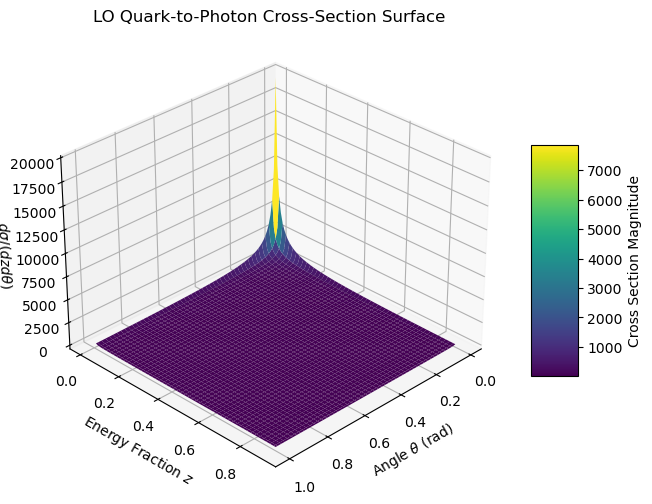

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 1. Define ranges
theta = np.linspace(0.01, 1.0, 100) # Angle from 0.05 to 1 rad
z = np.linspace(0.01, 0.9, 100)      # Energy fraction from 0.1 to 0.9

# Create a grid
T, Z = np.meshgrid(theta, z)

# 2. Define the Splitting Function P(z)
# P(z) = (1 + (1-z)^2) / z
P_z = (1 + (1 - Z)**2) / Z

# 3. Define the Angular Divergence
# Div ~ 1/theta
Angular_Part = 1.0 / T

# 4. The Full Double Differential Cross Section
# dSigma / (dz dtheta)
dSigma = P_z * Angular_Part

# 5. Plotting
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(T, Z, dSigma, cmap='viridis', edgecolor='none')

# --- Change the View Here ---
# elev = height (0 is flat), azim = rotation (clockwise)
ax.view_init(elev=30, azim=45) 
# ----------------------------

ax.set_xlabel(r'Angle $\theta$ (rad)')
ax.set_ylabel(r'Energy Fraction $z$')
ax.set_zlabel(r'$d\sigma / (dz d\theta)$')
ax.set_title('LO Quark-to-Photon Cross-Section Surface')

plt.colorbar(surf, shrink=0.5, aspect=5, label='Cross Section Magnitude')
plt.show()

## The variation of differential cross section with respect to $\theta$ (FIGURE 3)

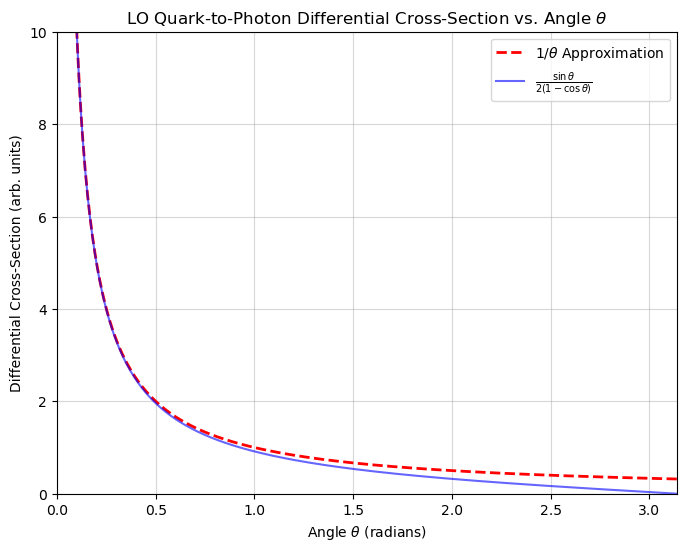

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the angle theta (in radians)
# Start slightly above 0 to avoid division by zero
theta = np.linspace(0.01, 3.14, 500) 

# The 1/theta approximation for the divergence
d_sigma_approx = 1.0 / theta

# The more accurate angular shape derived from the propagator: 
# Propagator ~ 1/(1 - cos(theta))
# Phase space factor ~ sin(theta)
# Resulting shape ~ sin(theta) / (1 - cos(theta))
d_sigma_exact_shape = np.sin(theta) / (1 - np.cos(theta)) 

# Scale the exact shape by 0.5 so it asymptotically matches 1/theta (since limit of sin/(1-cos) is 2/theta)
d_sigma_exact_shape_scaled = d_sigma_exact_shape * 0.5

plt.figure(figsize=(8, 6))

# Plot the 1/theta divergence
plt.plot(theta, d_sigma_approx, label=r'$1/\theta$ Approximation', color='red', linestyle='--', linewidth=2)

# Plot the physical shape
plt.plot(theta, d_sigma_exact_shape_scaled, label=r'$  \frac{\sin\theta}{2(1-\cos\theta)}$', color='blue', alpha=0.6)

plt.title(r'LO Quark-to-Photon Differential Cross-Section vs. Angle $\theta$')
plt.xlabel(r'Angle $\theta$ (radians)')
plt.ylabel(r'Differential Cross-Section (arb. units)')
plt.ylim(0, 10)
plt.xlim(0, 3.14)
plt.grid(True, alpha=0.5)
plt.legend()

plt.show()

## Dependence of the isolation profile on the parameter $n$ (FIGURE 4)

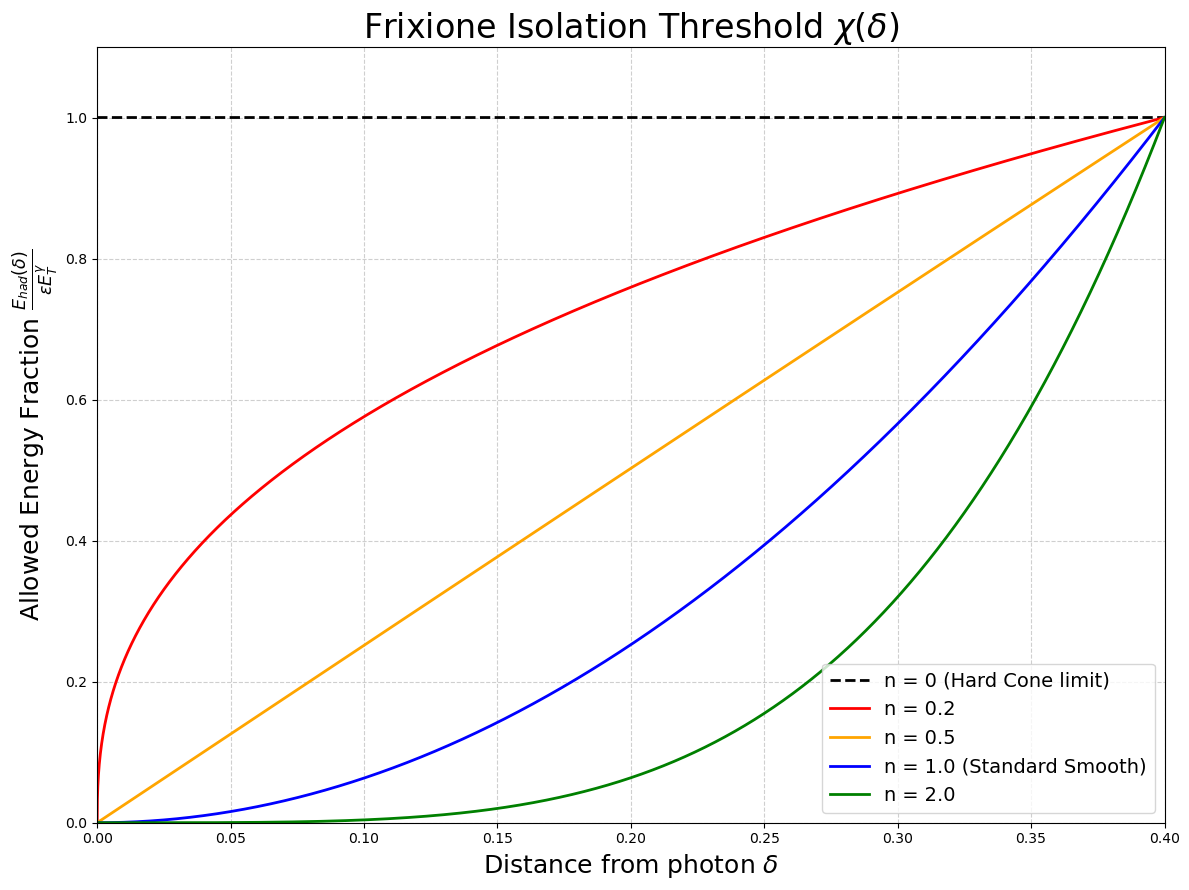

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def plot_frixione_isolation():
    # ---------------------------------------------------------
    # Parameters
    # ---------------------------------------------------------
    R0 = 0.4            # Cone radius (typical experimental value)
    epsilon_norm = 1.0  # Normalized threshold
    
    # Generate delta values from 0 to R0
    # I use a high resolution to show the behavior near delta=0
    deltas = np.linspace(0, R0, 5000)

    # ---------------------------------------------------------
    # Frixione Isolation Function
    # Formula: X(delta) = epsilon * ((1 - cos(delta)) / (1 - cos(R0)))^n
    # ---------------------------------------------------------
    def get_threshold(delta, n, R0):
        # The term representing the angular dependence
        angular_term = (1 - np.cos(delta)) / (1 - np.cos(R0))
        
        # Calculate threshold
        return epsilon_norm * (angular_term ** n)

    # ---------------------------------------------------------
    # Plotting
    # ---------------------------------------------------------
    plt.figure(figsize=(12, 9))
    
    # Define n values to plot
    # n=0 recovers the Hard Cone (constant threshold)
    # n=0.2 shows the transition (step-like rise)
    # n=1 is the standard smooth cone
    n_values = [0, 0.2, 0.5, 1.0, 2.0]
    
    colors = ['black', 'red', 'orange', 'blue', 'green']
    styles = ['--', '-','-', '-', '-']

    for n, color, style in zip(n_values, colors, styles):
        chi = get_threshold(deltas, n, R0)
        
        # Label generation
        label_text = f'n = {n}'
        if n == 0:
            label_text += ' (Hard Cone limit)'
        elif n == 1.0:
            label_text += ' (Standard Smooth)'
            
        plt.plot(deltas, chi, label=label_text, color=color, linestyle=style, linewidth=2)

    # Styling the plot
    plt.title(r'Frixione Isolation Threshold $\chi(\delta)$', fontsize=24)
    plt.xlabel(r'Distance from photon $\delta$', fontsize=18)
    plt.ylabel(r'Allowed Energy Fraction $ \frac{E_{had}(\delta)}{\epsilon E_T^\gamma}$', fontsize=18)
    plt.xlim(0, R0)
    plt.ylim(0, 1.1)
    plt.grid(True, which='both', linestyle='--', alpha=0.6)
    plt.legend(loc='lower right', fontsize=14)
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    plot_frixione_isolation()

## Comparison of the allowed hadronic transverse momentum ($p_{T,had}$) as a function of the opening angle $\theta$ for Frixione Isolation and Soft Drop Isolation (FIGURE 5)

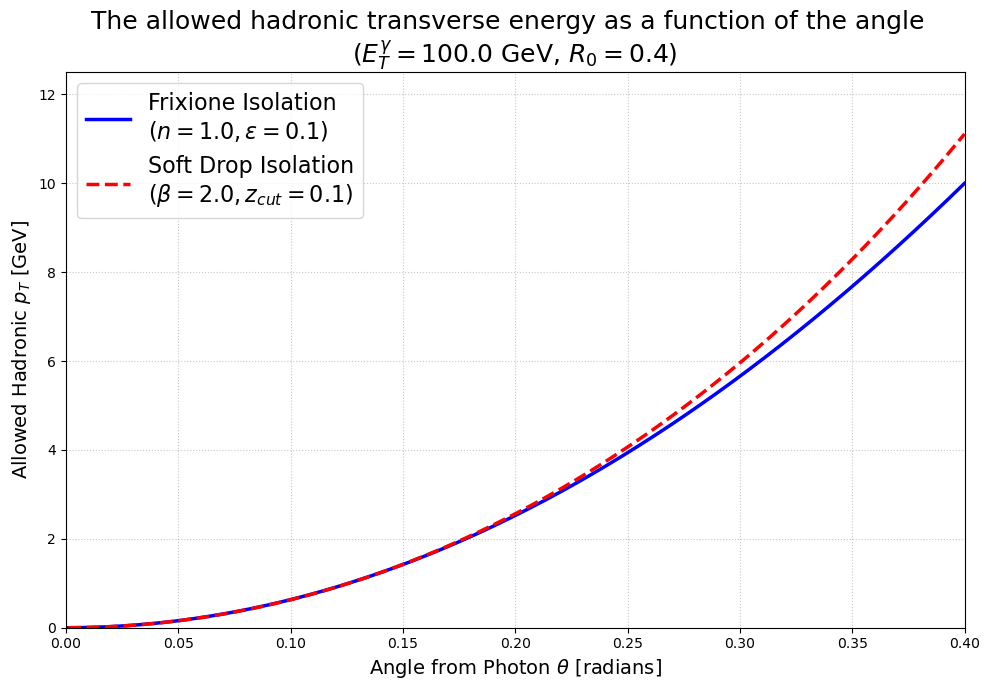

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def plot_sdi_vs_frixione():
    # ==========================================
    # 1. Physics Parameters
    # ==========================================
    PT_gamma = 100.0  # Photon Transverse Momentum [GeV]
    R0 = 0.4          # Cone Radius
    
    # Frixione Parameters
    epsilon = 0.1     # Max energy fraction at edge (10%) received this value from the Hall's paper
    n = 1.0           # Smooth cone exponent
    
    # SDI Parameters (Using the mapping for equivalence)
    z_cut = epsilon   # Mapped parameter
    beta = 2 * n      # Mapped parameter
    
    # Angular domain (avoid 0 to prevent division errors)
    theta = np.linspace(0.001, R0, 5000)

    # ==========================================
    # 2. Define the Boundaries
    # ==========================================
    
    # --- Frixione Boundary ---
    # Formula: pT_max = epsilon * PT_gamma * ((1-cos(theta))/(1-cos(R0)))^n
    term_frix = (1 - np.cos(theta)) / (1 - np.cos(R0))
    pt_frixione = epsilon * PT_gamma * (term_frix ** n)

    # --- Soft Drop Isolation (SDI) Boundary ---
    # The condition is on z: z_critical = z_cut * (theta/R0)^beta
    # We must convert z back to pT.
    # Definition: z = min(pT_rad, PT_gamma) / (pT_rad + PT_gamma)
    # Inverse: pT_rad = z * PT_gamma / (1 - z)  (assuming pT_rad < PT_gamma)
    
    z_boundary = z_cut * (theta / R0) ** beta
    
    # Filter valid z (z must be < 1, though usually z_cut is small)
    z_boundary = np.minimum(z_boundary, 0.99) 
    
    pt_sdi = (z_boundary * PT_gamma) / (1 - z_boundary)

    # ==========================================
    # 3. Plotting
    # ==========================================
    plt.figure(figsize=(10, 7))
    
    # Plot curves
    plt.plot(theta, pt_frixione, 'b-', linewidth=2.5, label=f'Frixione Isolation\n($n={n}, \epsilon={epsilon}$)')
    plt.plot(theta, pt_sdi, 'r--', linewidth=2.5, label=f'Soft Drop Isolation\n($\\beta={beta}, z_{{cut}}={z_cut}$)')
    

    # Labels and Styling
    plt.title(f'The allowed hadronic transverse energy as a function of the angle  \n($E_T^\gamma = {PT_gamma}$ GeV, $R_0 = {R0}$)', fontsize=18)
    plt.xlabel(r'Angle from Photon $\theta$ [radians]', fontsize=14)
    plt.ylabel(r'Allowed Hadronic $p_T$ [GeV]', fontsize=14)
    
    # Limits
    plt.xlim(0, R0)
    plt.ylim(0, PT_gamma * epsilon * 1.25) # Zoom in on the relevant soft region
    
    plt.grid(True, linestyle=':', alpha=0.7)
    plt.legend(loc='upper left', fontsize=16, framealpha=0.8)
    

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    plot_sdi_vs_frixione()

## Comparison of Monte Carlo integration with the theoretical splitting function (FIGURE 6)

C:\Users\Mehmet\AppData\Local\Temp\ipykernel_10780\3791203698.py:68: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  normalization = np.trapz(theory_curve, z_axis)


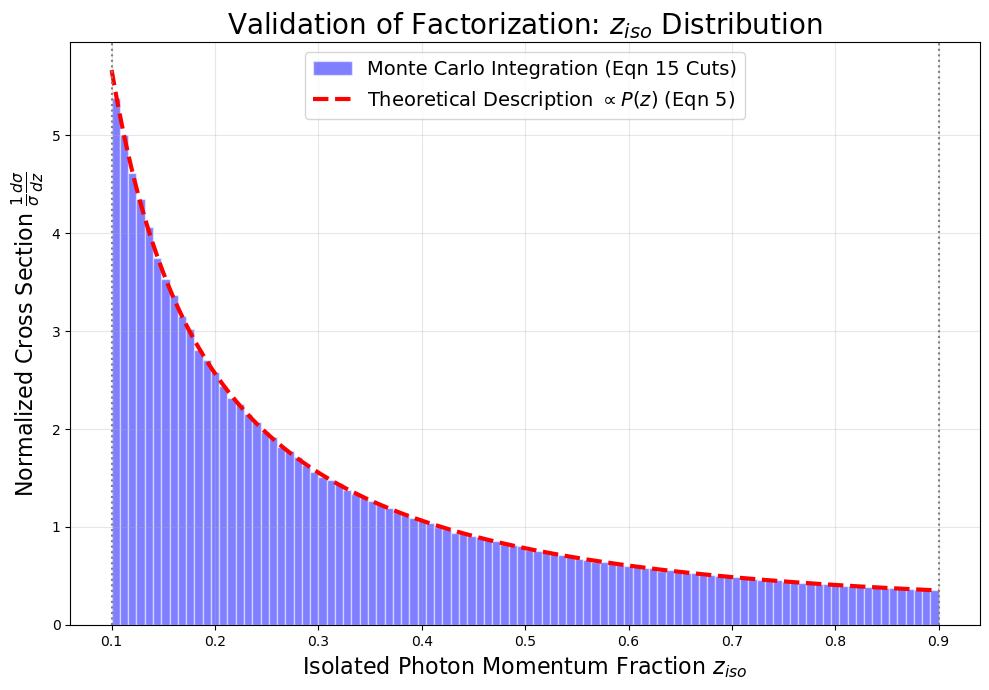

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def monte_carlo_ziso_simulation():
    # ==========================================
    # 1. Physics Parameters
    # ==========================================
    N_samples = 5000000      # Number of random trial points
    R = 0.4                 # Jet Radius
    theta_min = 0.01        # Minimum resolution angle
    z_cut = 0.1             # Soft Drop Threshold
    
    # ==========================================
    # 2. Monte Carlo Integration Strategy
    # ==========================================
    # I generate "Raw" uniform points in the phase space
    # and "Weigh" them by the physical cross-section: dsigma ~ P(z)/theta
    
    # A. Generate Random Phase Space Points
    # z between 0 and 1
    z_trials = np.random.uniform(0, 1, N_samples)
    # theta between theta_min and R
    theta_trials = np.random.uniform(theta_min, R, N_samples)
    
    # B. Calculate Weights
    # Weight W = (1/theta) * P(z)
    # P(z) = (1 + (1-z)^2) / z
    P_z = (1 + (1 - z_trials)**2) / z_trials
    
    # The geometric factor 1/theta
    angular_factor = 1.0 / theta_trials
    
    weights = P_z * angular_factor
    
    # ==========================================
    # 3. Apply Cuts from Equation (3.3)
    # ==========================================
    # Condition 1: z > z_cut (Photon is hard)
    # Condition 2: z < 1 - z_cut (Quark is hard -> derived from (1-z) > z_cut)
    # Condition 3: theta is valid (implicitly handled by generation range)

    #It acts like a filter
    mask = (z_trials > z_cut) & (z_trials < (1 - z_cut))
    
    # Filter the data
    valid_z = z_trials[mask]
    valid_weights = weights[mask]
    
    # ==========================================
    # 4. Plotting
    # ==========================================
    plt.figure(figsize=(10, 7))
    
    # --- Simulated Histogram (Weighted) ---
    # This represents the LHS of Eq 3.4 (dsigma/dz_iso) in the paper
    count, bins, patches = plt.hist(valid_z, bins=100, weights=valid_weights,
                                    density=True, color='blue', alpha=0.5,
                                    edgecolor='white', label='Monte Carlo Integration (Eqn 15 Cuts)')
    
    # --- Analytical Prediction (Eq 3.4) in the paper ---
    # The theory says the shape should be EXACTLY proportional to P(z)
    # defined on the range [z_cut, 1-z_cut]
    z_axis = np.linspace(z_cut, 1 - z_cut, 500)
    theory_curve = (1 + (1 - z_axis)**2) / z_axis
    
    # Normalize theory to match the histogram area
    # (Simple numerical normalization for visual comparison)
    normalization = np.trapz(theory_curve, z_axis)
    # Since density=True ensures area=1, we normalize theory to area=1
    theory_curve /= normalization
    
    plt.plot(z_axis, theory_curve, 'r--', linewidth=3, 
             label=r'Theoretical Description $\propto P(z)$ (Eqn 5)')
    
    # Annotations
    plt.axvline(z_cut, color='gray', linestyle=':')
    plt.axvline(1 - z_cut, color='gray', linestyle=':')
    
    plt.title(r'Validation of Factorization: $z_{iso}$ Distribution', fontsize=20)
    plt.xlabel(r'Isolated Photon Momentum Fraction $z_{iso}$', fontsize=16)
    plt.ylabel(r'Normalized Cross Section $\frac{1}{\sigma} \frac{d\sigma}{dz}$', fontsize=16)
    plt.legend(fontsize=14)
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    monte_carlo_ziso_simulation()

## The relationship between pion energy and photon opening angle (FIGURE 7)

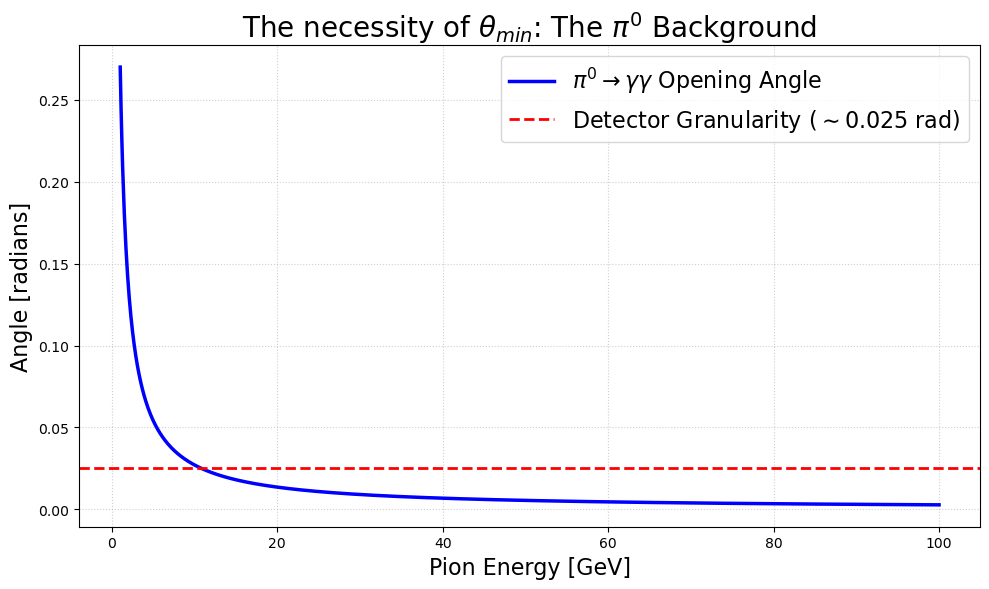

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def plot_pion_granularity():
    # ==========================================
    # 1. Physics Parameters
    # ==========================================
    mass_pi0 = 0.135       # Mass of Neutral Pion in GeV
    energy = np.linspace(1, 100, 1000) # Pion Energy from 1 to 100 GeV
    
    # Detector Resolution (Granularity)
    # Typical electromagnetic calorimeter resolution mentioned in the paper of Hall
    theta_detector_limit = 0.025 
    
    # ==========================================
    # 2. Physics Formula: Decay Angle
    # ==========================================
    # The minimum opening angle between the two photons is approx:
    # theta_min = 2 * mass / Energy
    theta_opening = (2 * mass_pi0) / energy

    # ==========================================
    # 3. Plotting
    # ==========================================
    plt.figure(figsize=(10, 6))
    
    # Plot the Pion Opening Angle
    plt.plot(energy, theta_opening, 'b-', linewidth=2.5, label=r'$\pi^0 \to \gamma\gamma$ Opening Angle')
    
    # Plot the Detector Limit
    plt.axhline(y=theta_detector_limit, color='red', linestyle='--', linewidth=2, 
                label=f'Detector Granularity ($\sim {theta_detector_limit}$ rad)')
    
    # Shade the "Danger Zone"
    # Where the angle is smaller than the detector can see

    # Annotations
    plt.title(r'The necessity of $\theta_{min}$: The $\pi^0$ Background', fontsize=20)
    plt.xlabel('Pion Energy [GeV]', fontsize=16)
    plt.ylabel('Angle [radians]', fontsize=16)
    plt.legend(fontsize=16, loc='upper right')
    plt.grid(True, linestyle=':', alpha=0.6)
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    plot_pion_granularity()